# Capstone Project 2 Jonathan Odilo

## Latar Belakang

Saat ini, `Purwa Store` sedang melakukan evaluasi terhadap penjualan barang di toko dari 2012-2014. Demografi pelanggan, uang yang dibelanjakan, promosi, dan tempat pembelian diperoleh dari toko. Saat ini, akan dilakukan analisis untuk mendapatkan insight dan membentuk strategi 

## Rumusan Masalah

1. Apakah demografi pembeli berhubungan pada jumlah uang yang dibelanjakan?
2. Apakah promosi berhubungan dengan jumlah uang yang dibelanjakan?
3. Apakah tempat pembelian berhubungan dengan jumlah uang yang dibelanjakan?

## Hipotesis

1. Demografi berhubungan dengan jumlah uang yang dibelanjakan
2. Promosi berhubungan dengan jumlah uang yang dibelanjakan
3. Tempat pembelain berhubungan dengan jumlah uang yang dibelanjakan

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Supermarket Customers Data Dictionary
People

● ID: Customer's unique identifier
● Year_Birth: Customer's birth year
● Education: Customer's education level
● Marital_Status: Customer's marital status
● Income: Customer's yearly household income
● Kidhome: Number of children in customer's household
● Teenhome: Number of teenagers in customer's household
● Dt_Customer: Date of customer's enrollment with the company
● Recency: Number of days since customer's last purchase
● Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

● MntWines: Amount spent on wine in last 2 years
● MntFruits: Amount spent on fruits in last 2 years
● MntMeatProducts: Amount spent on meat in last 2 years
● MntFishProducts: Amount spent on fish in last 2 years
● MntSweetProducts: Amount spent on sweets in last 2 years
● MntGoldProds: Amount spent on gold in last 2 years

Promotion

● NumDealsPurchases: Number of purchases made with a discount
● AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
● AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
● AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
● AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
● AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
● Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

Place

● NumWebPurchases: Number of purchases made through the company’s website
● NumCatalogPurchases: Number of purchases made using a catalog
● NumStorePurchases: Number of purchases made directly in stores
● NumWebVisitsMonth: Number of visits to the company’s website in the last month

In [29]:
df = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
df['Age'] = 2015- df['Year_Birth']
df['AllMnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,AllMnt
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,58,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,61,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,50,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,31,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,34,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,48,1341
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,69,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,34,1241
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,59,843


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


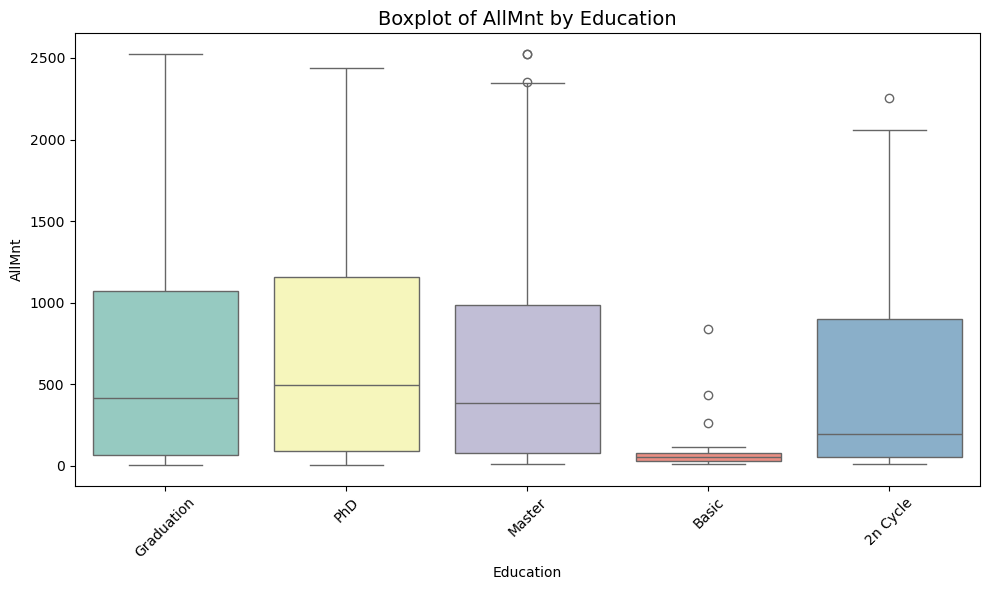

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


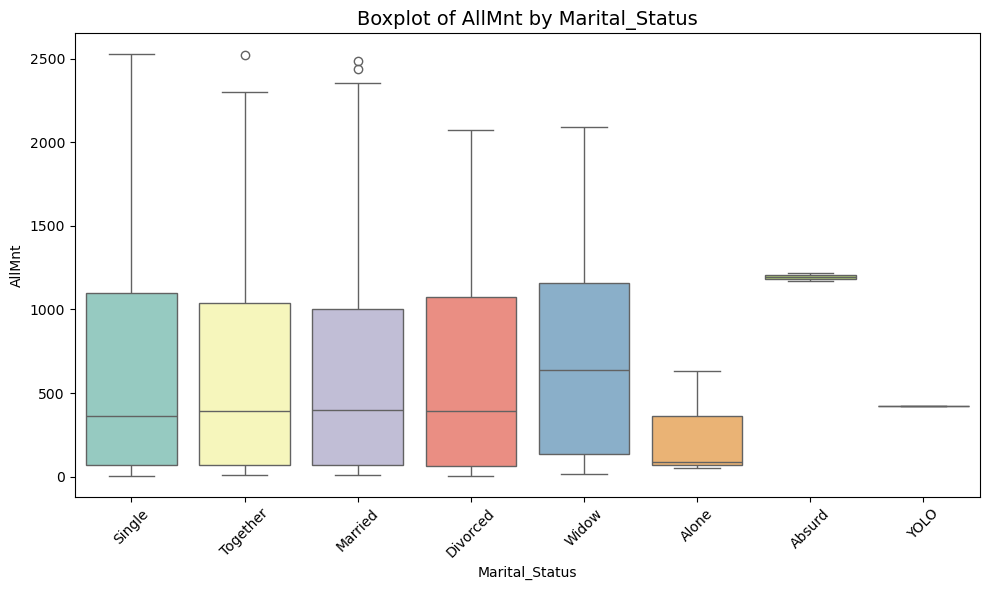

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


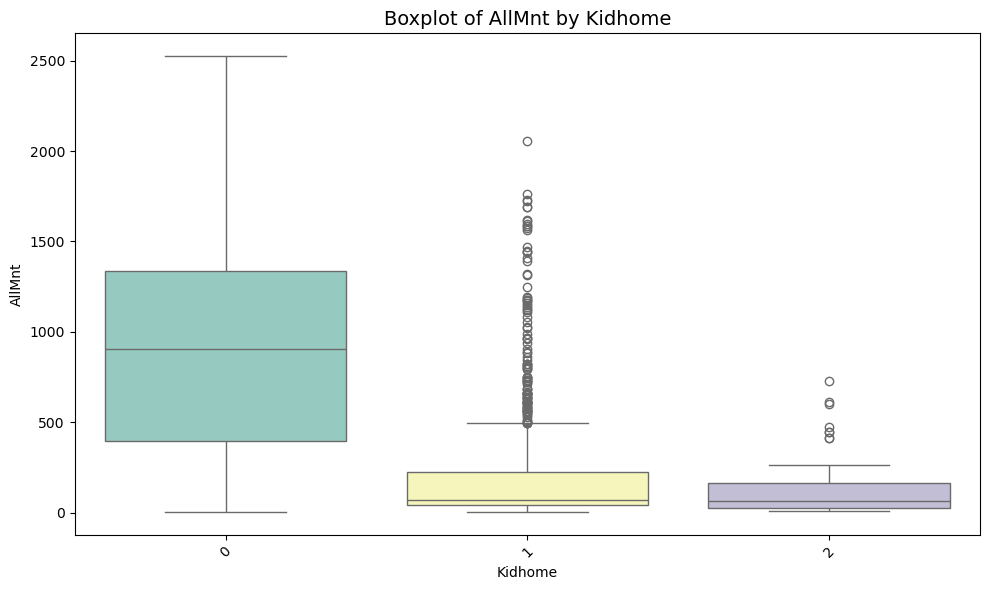

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


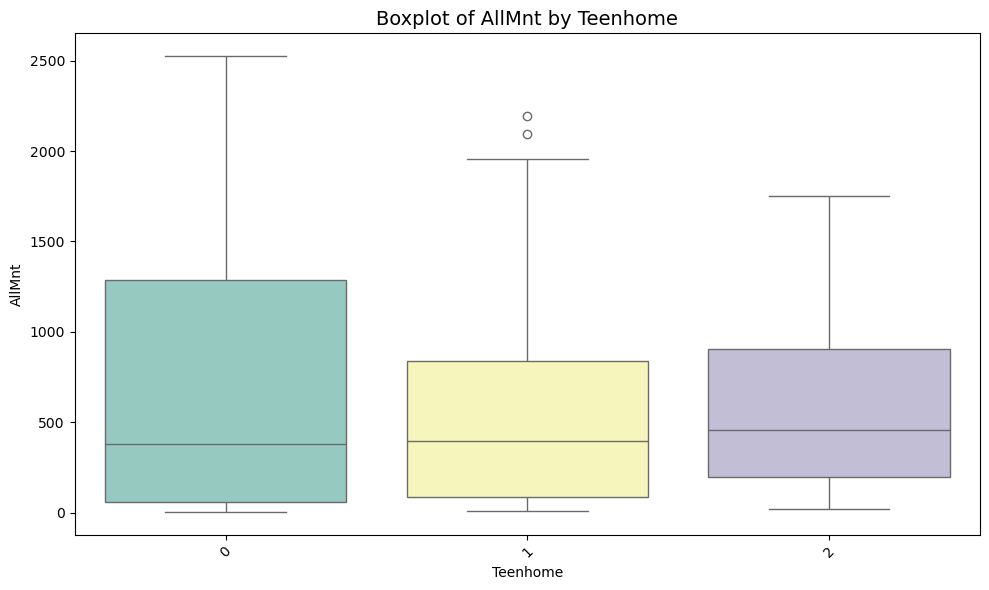

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


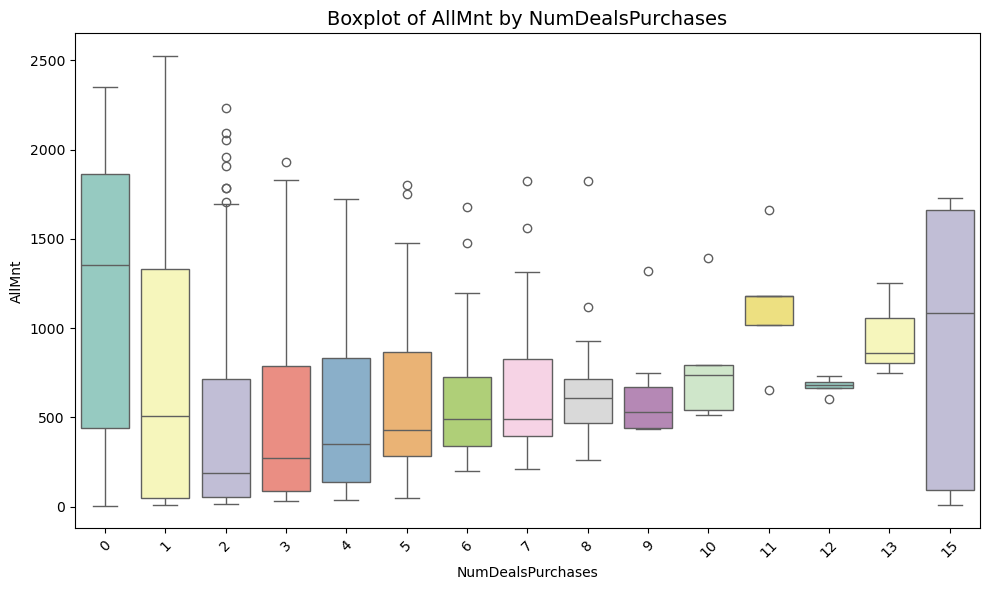

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


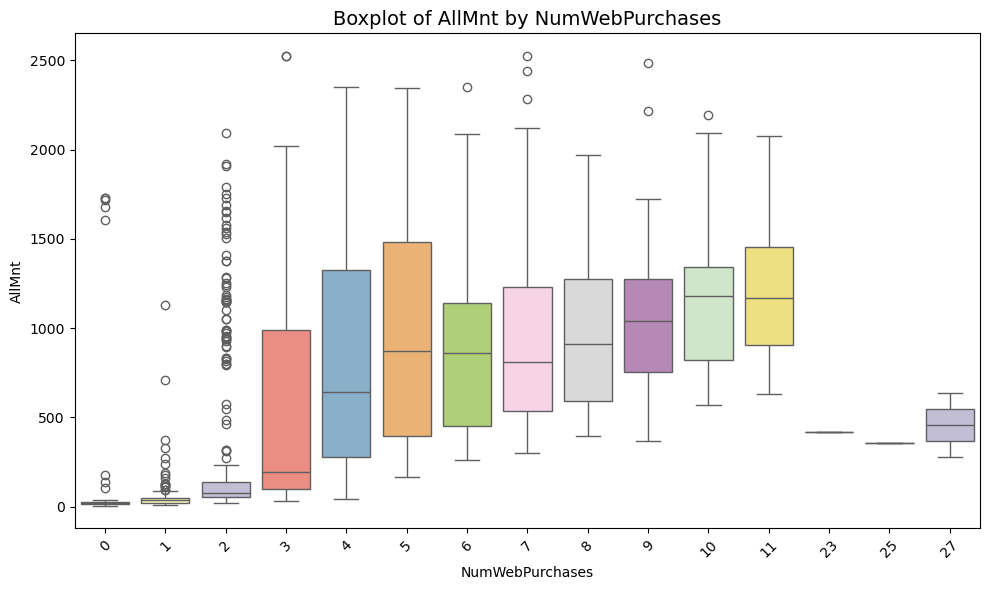

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


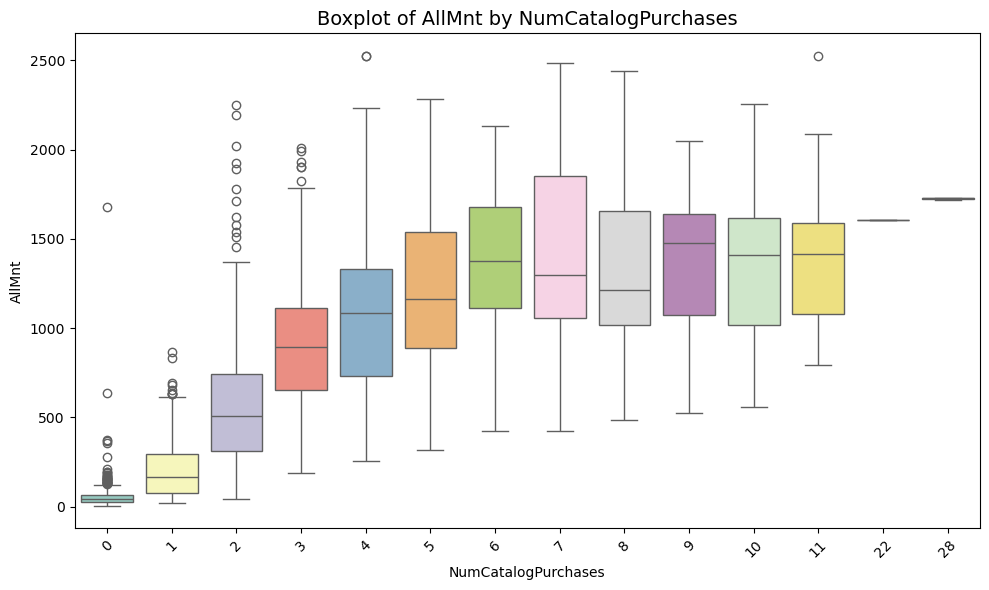

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


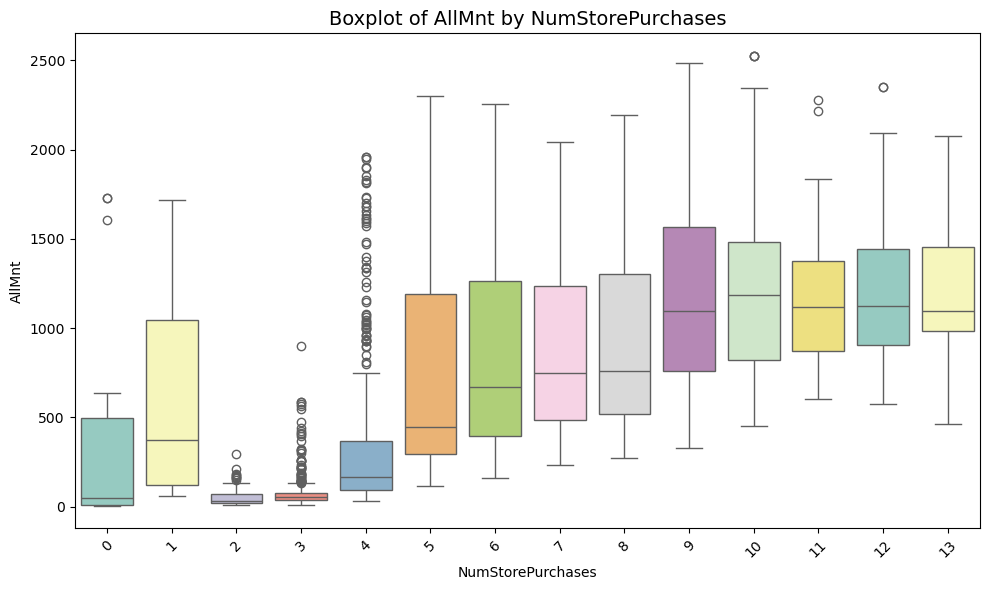

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


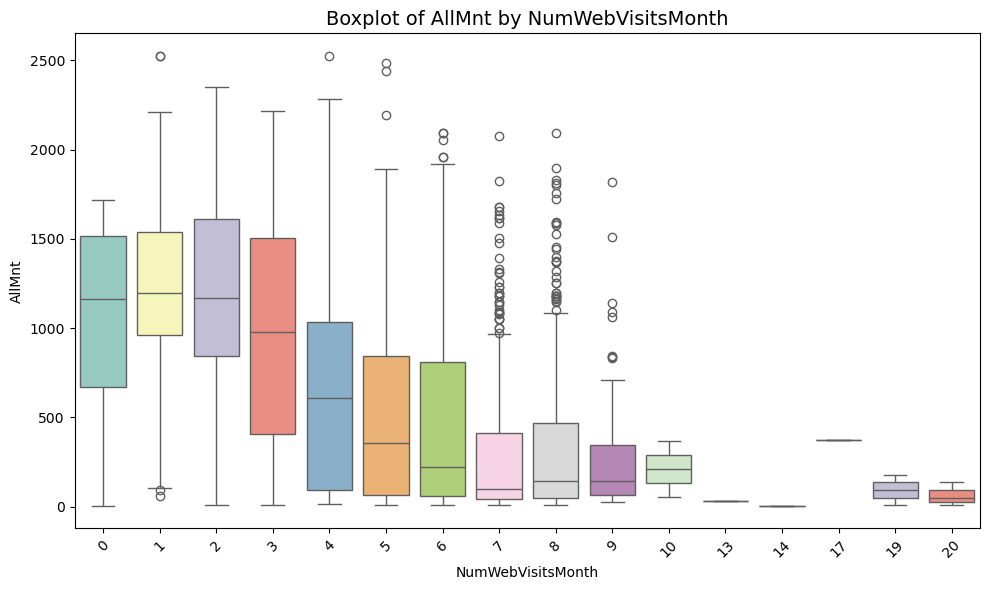

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


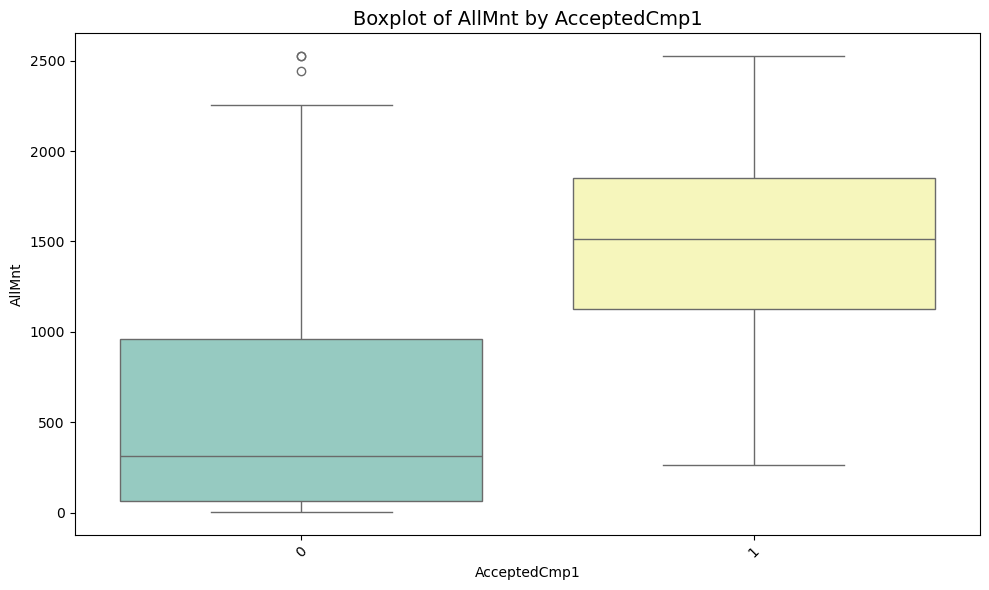

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


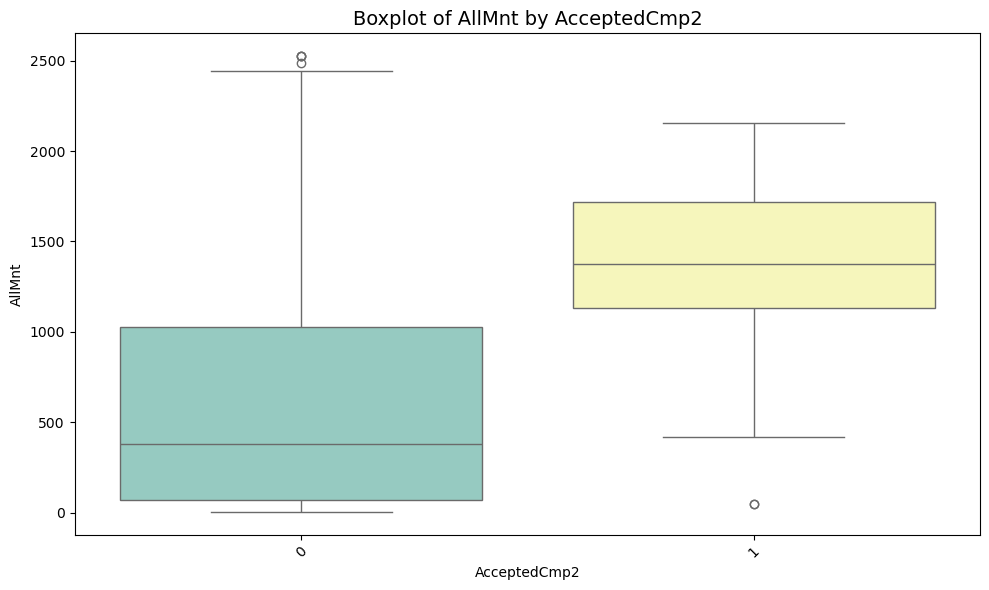

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


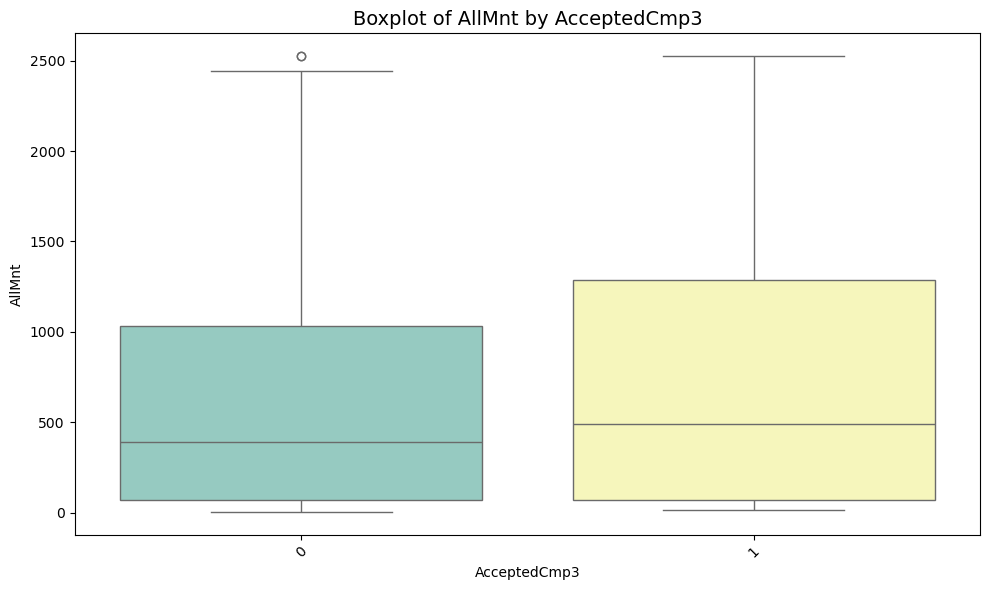

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


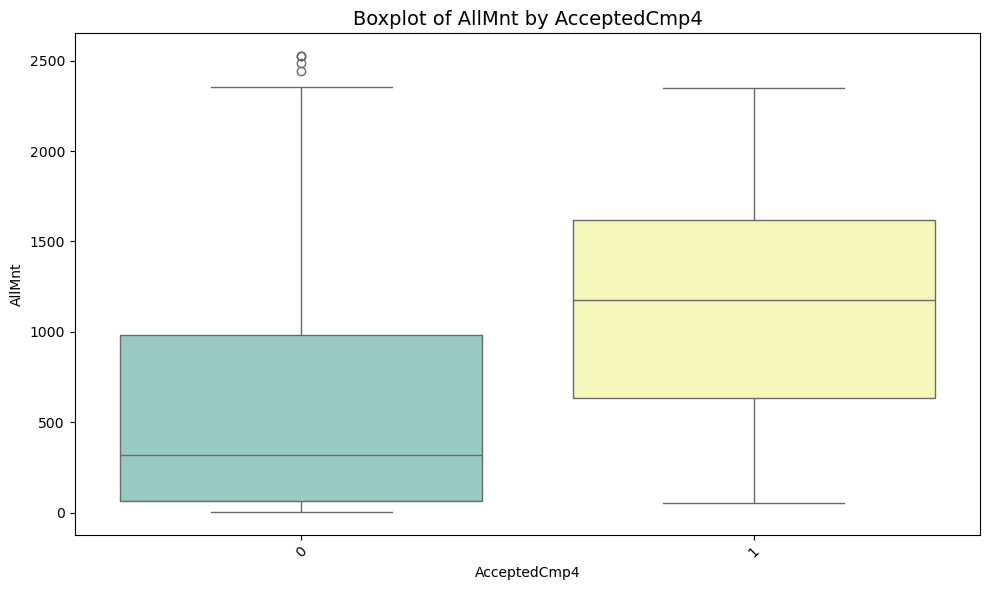

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


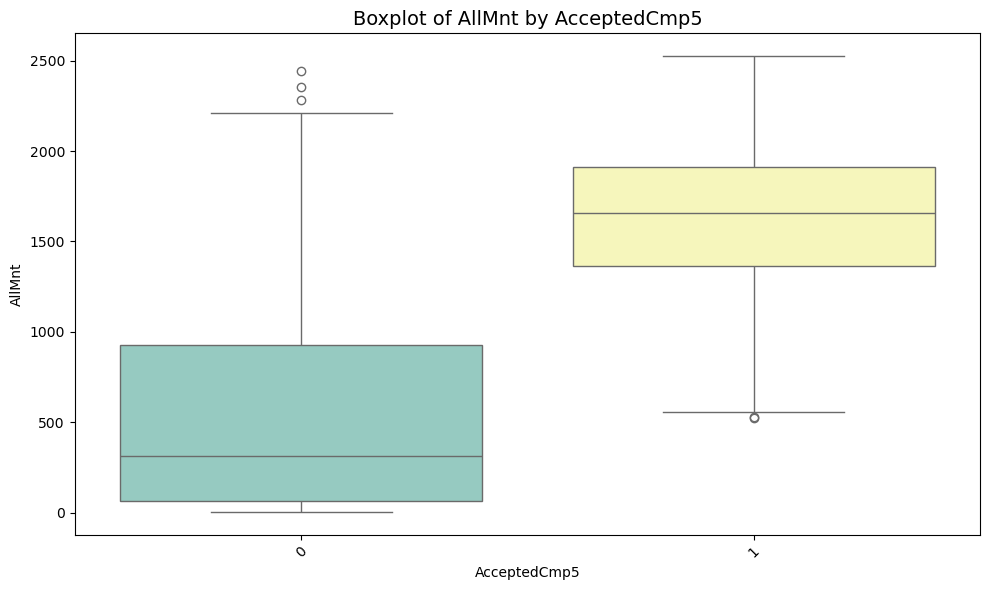

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


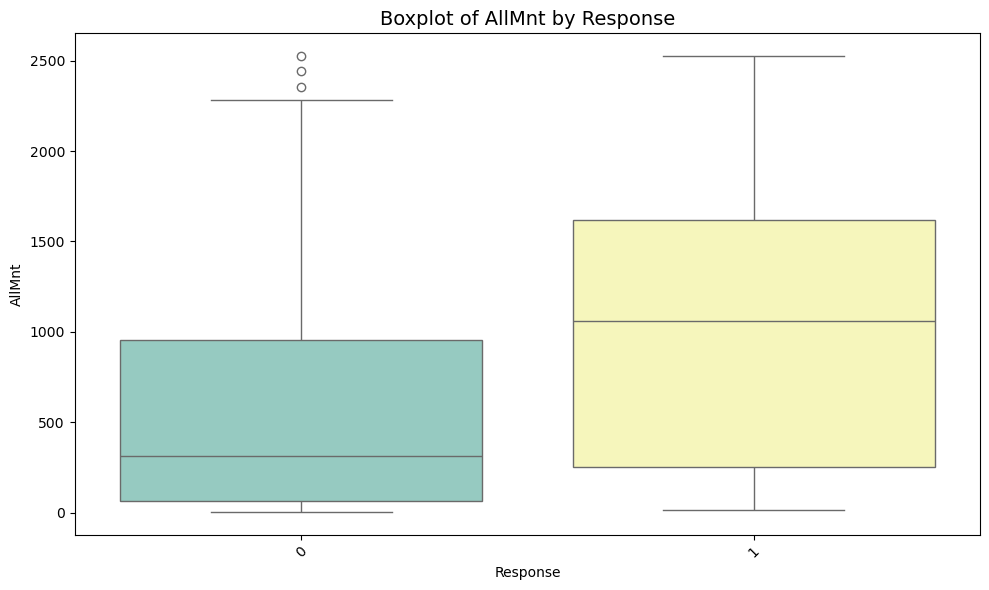

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\2344816338.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')


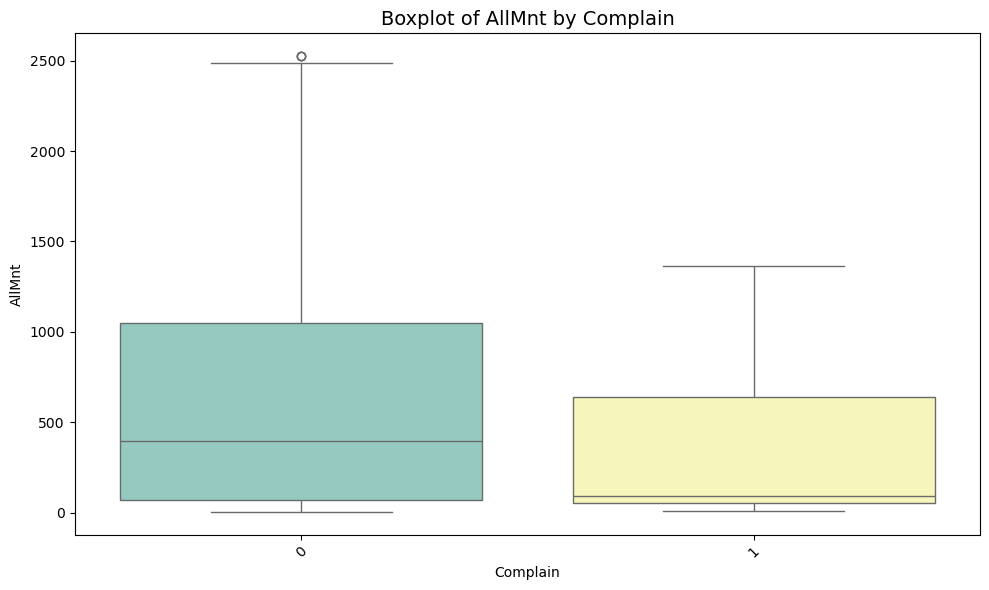

In [31]:
categ_var = [
    'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
    'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'Response', 'Complain'
]

for var in categ_var:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y='AllMnt', data=df, palette='Set3')
    plt.title(f'Boxplot of AllMnt by {var}', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

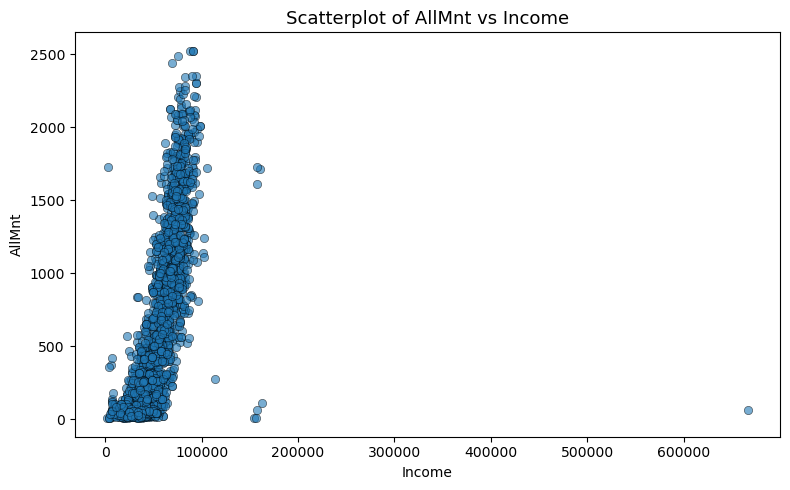

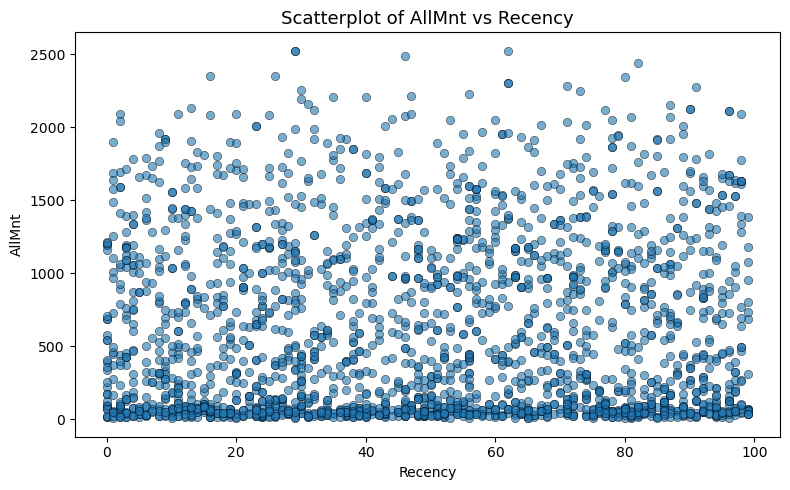

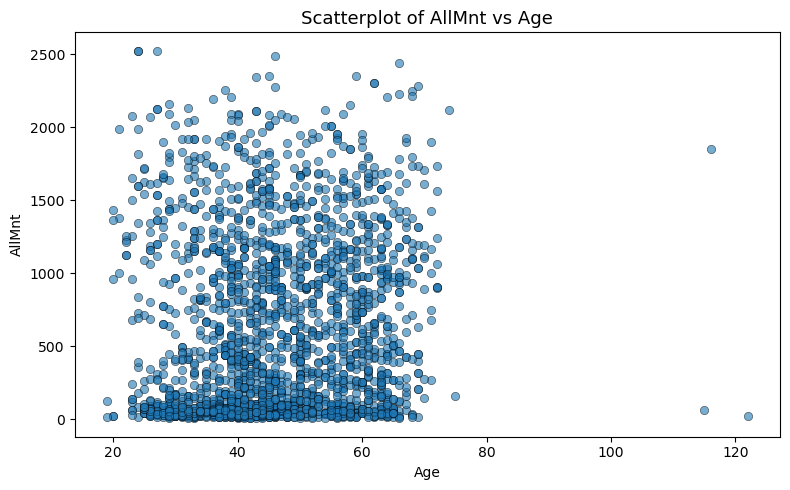

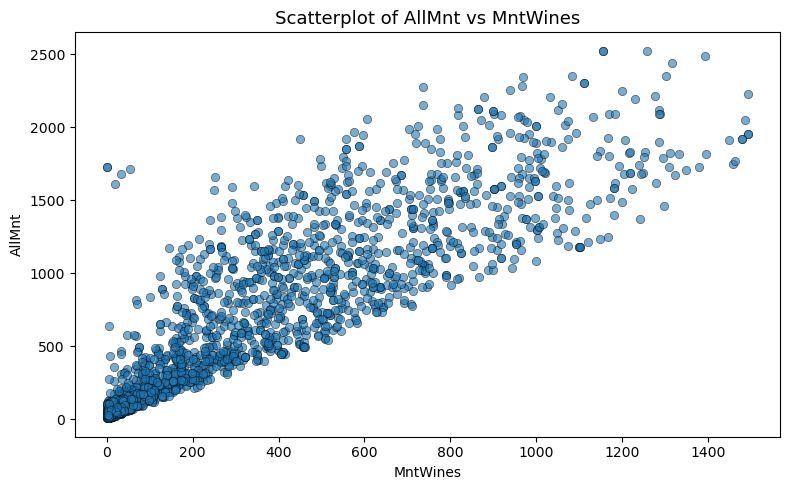

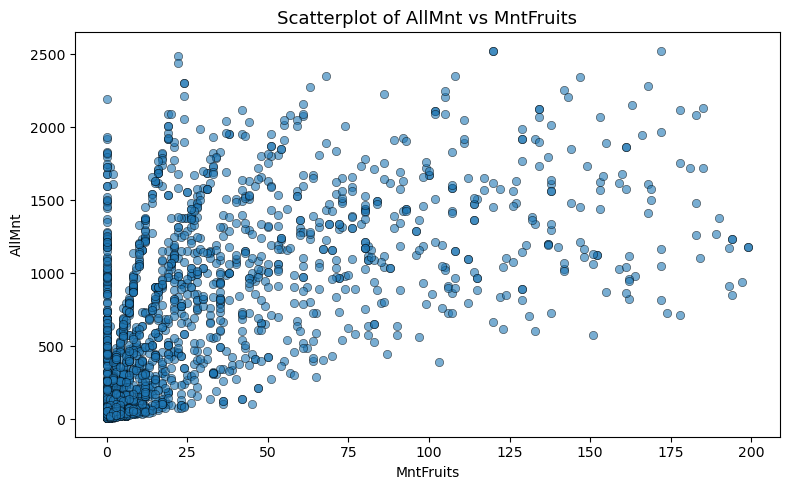

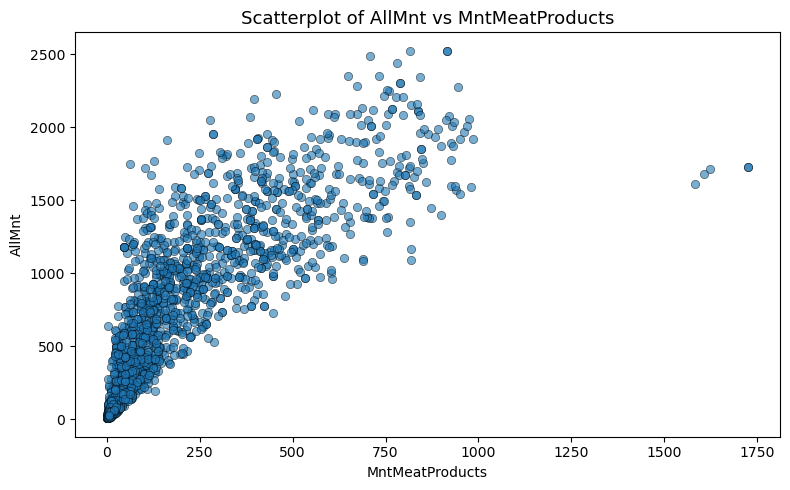

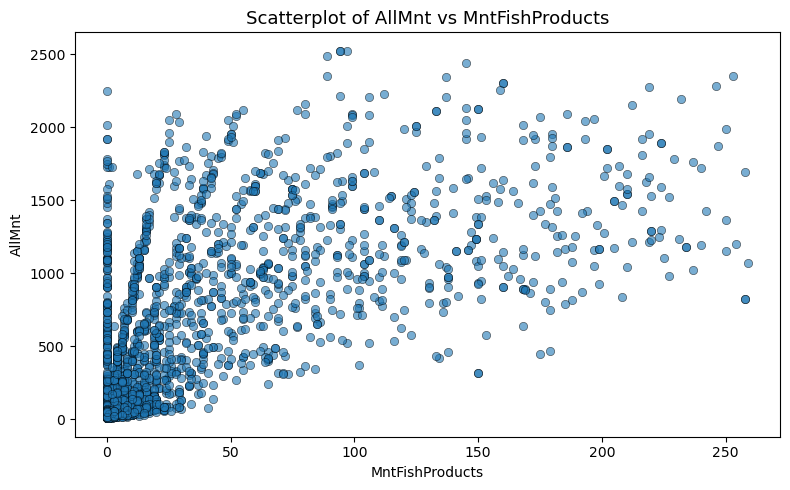

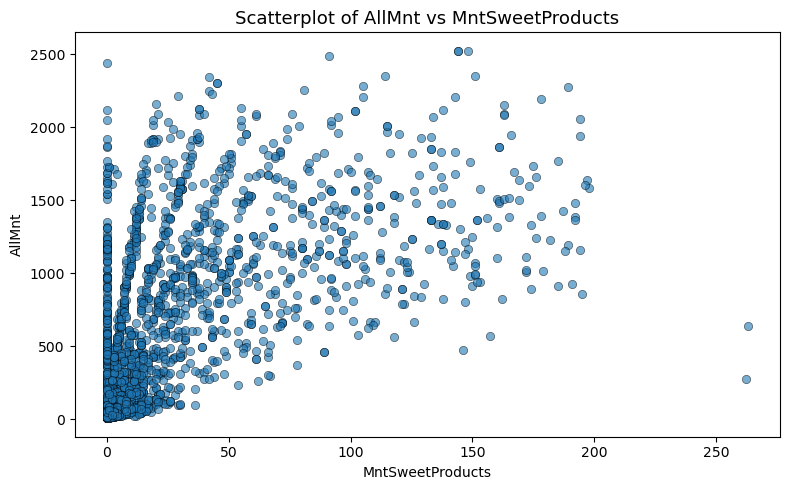

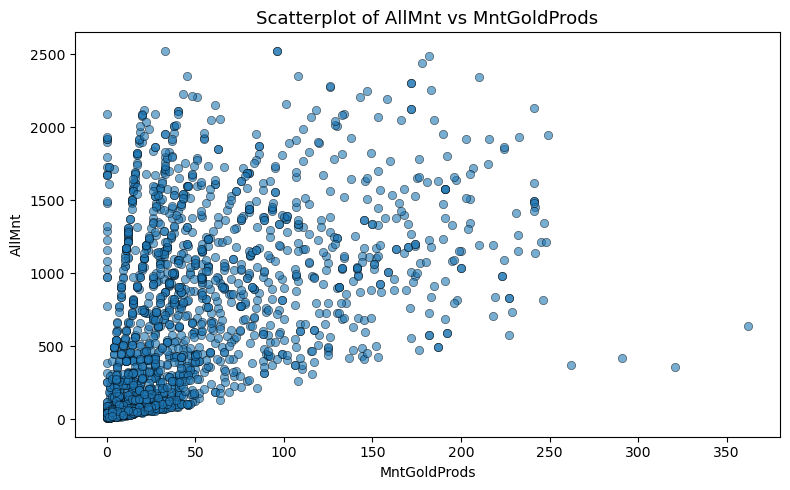

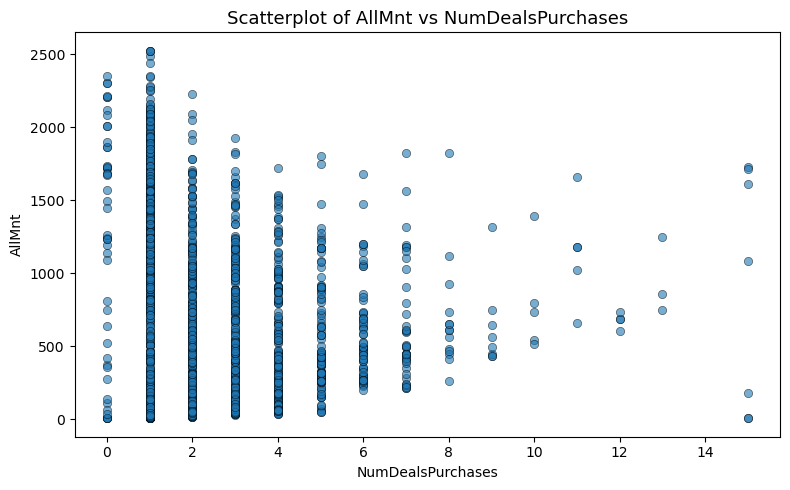

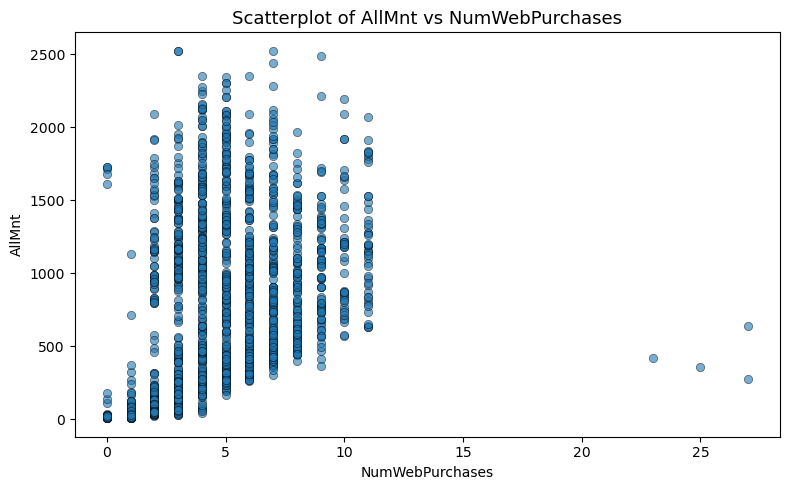

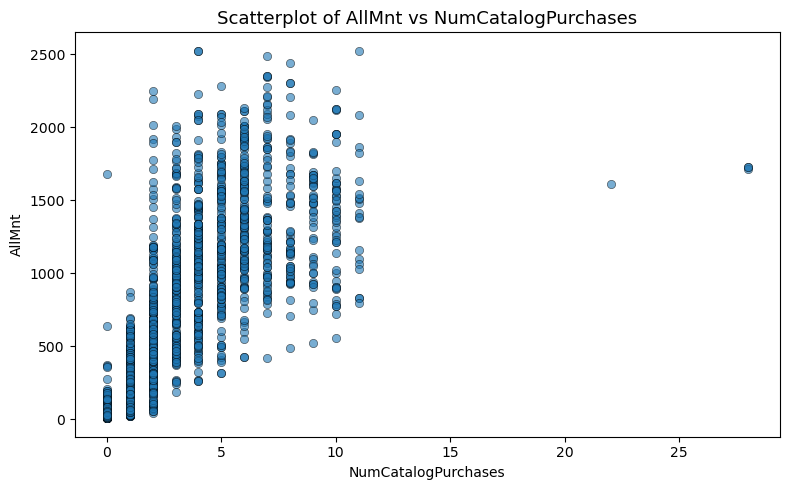

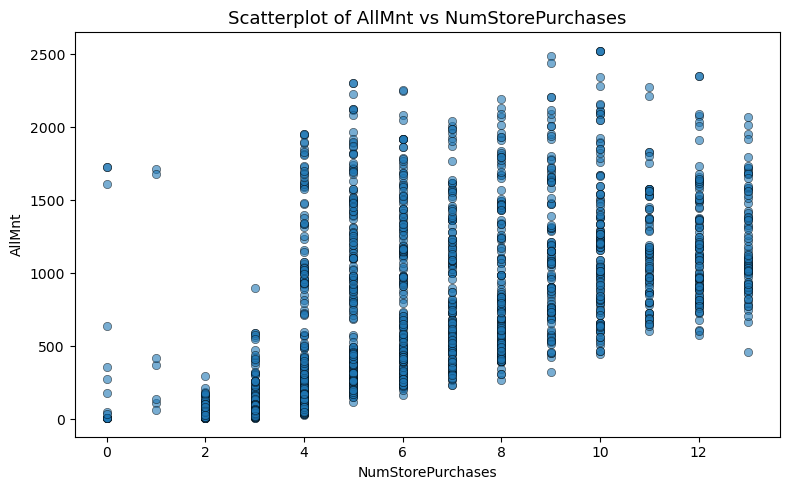

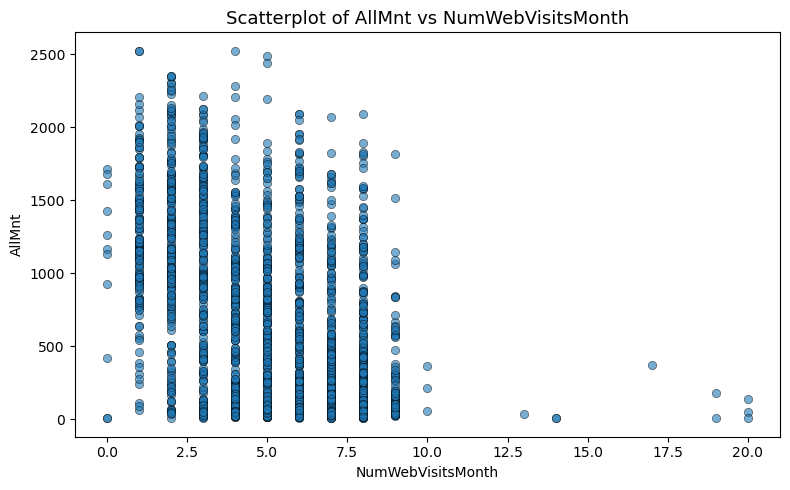

In [32]:
numerical_vars = [
    'Income', 'Recency', 'Age',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]

for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=var, y='AllMnt', data=df, alpha=0.6, edgecolor='k')
    plt.title(f'Scatterplot of AllMnt vs {var}', fontsize=13)
    plt.tight_layout()
    plt.show()

In [33]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,AllMnt
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,46.194196,605.798214
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,602.249288
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,19.000000,5.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,38.000000,68.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000,396.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,56.000000,1045.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,122.000000,2525.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [34]:
pd.set_option('display.max_colwidth', 0)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

In [35]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,AllMnt
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,0,0,0,0,0,3,11,0,32,19
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,0,0,0,0,0,3,11,0,29,637
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,0,0,0,0,0,3,11,0,56,186
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,0,0,0,0,0,3,11,0,64,124
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,0,0,0,0,0,3,11,0,33,46
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,0,0,0,0,0,3,11,0,42,109
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,0,0,0,0,0,3,11,0,58,603
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,0,0,0,0,0,3,11,0,58,18
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,0,0,0,0,0,3,11,0,42,985
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,0,0,0,0,0,3,11,0,54,404


In [36]:
mar_stat = df['Marital_Status'].unique()
group_mar = [df[(df['Marital_Status'] == dty)].shape[0] for dty in mar_stat]
print(mar_stat, group_mar)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO'] [480, 580, 864, 232, 77, 3, 2, 2]


- Untuk mempermudah analisis, 2n Cycle pada edukasi akan diganti menjadi master

In [37]:
mar_stat = df['Education'].unique()
group_mar = [df[(df['Education'] == dty)].shape[0] for dty in mar_stat]
print(mar_stat, group_mar)

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle'] [1127, 486, 370, 54, 203]


In [38]:
df['Education'].replace(to_replace='2n Cycle', value='Master', inplace=True)
mar_stat = df['Education'].unique()
group_mar = [df[(df['Education'] == dty)].shape[0] for dty in mar_stat]
print(mar_stat, group_mar)

['Graduation' 'PhD' 'Master' 'Basic'] [1127, 486, 573, 54]


C:\Users\USER\AppData\Local\Temp\ipykernel_18172\3999625746.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].replace(to_replace='2n Cycle', value='Master', inplace=True)


Berdasarkan inspeksi visual, didapatkan adanya Outlier (beserta nilai) pada
- Income > 150000
- Age >100
- NumWebPurchases >20
- NumCatalogPurchases >20
- NumWebVisitsMonth >12.5

In [39]:
income_outlier = df[df['Income'] > 150000]
old_age_outlier = df[df['Age'] > 100]
web_purchases_outlier = df[df['NumWebPurchases'] > 20]
catalog_purchases_outlier = df[df['NumCatalogPurchases'] > 20]
web_visits_outlier = df[df['NumWebVisitsMonth'] > 12.5]

income_outlier_count = income_outlier.shape[0]
old_age_outlier_count = old_age_outlier.shape[0]
web_purchases_outlier_count = web_purchases_outlier.shape[0]
catalog_purchases_outlier_count = catalog_purchases_outlier.shape[0]
web_visits_outlier_count = web_visits_outlier.shape[0]

print(f"Income > 150000: {income_outlier_count} subjek")
print(f"Age > 100: {old_age_outlier_count} subjek")
print(f"NumWebPurchases > 20: {web_purchases_outlier_count} subjek")
print(f"NumCatalogPurchases > 20: {catalog_purchases_outlier_count} subjek")
print(f"NumWebVisitsMonth > 12.5: {web_visits_outlier_count} subjek")

Income > 150000: 8 subjek
Age > 100: 3 subjek
NumWebPurchases > 20: 4 subjek
NumCatalogPurchases > 20: 4 subjek
NumWebVisitsMonth > 12.5: 9 subjek


- Terdapat 2240 data dengan 29 Variabel pada database ini yang dibagi menjadi 4 kelompok, yaitu konsumen, produk, promosi, dan tempat pembelian
- Variabel income dengan missing values sebanyak 24 (1%) dari total data
- Terdapat anomali pada status perkawinan dengan status "Alone, Absurd, YOLO" masing-masing sebanyak 3,2,2 yang tidak dapat di konfirmasi atau diperkirakan dengan variabel lain
- Variabel Z_Revenue dan Z_CostContact tidak dapat ditemukan keterangannya, sehingga akan dihapus dari analisis
- Berdasarkan sumber data, Response merupakan respons penerimaan setelah kampanye terakhir (ke-6), sehingga AcceptedCmp1-5 dan response akan digabung menjadi variabel baru yaitu `Accepted_Cmp_New`
- Subjek-subjek pada outlier sebanyak 28 subjek akan di hapus dari analisis
- **Oleh karena itu, data dengan anomali pada status perkawinan, income missing, Z_Revenue, dan Z_CostContact diputuskan untuk di hapus, AcceptedCmp1-5 dan Response akan digabung**

In [40]:
outlier_index = df[
    (df['Income'] > 150000) |
    (df['Age'] > 100) |
    (df['NumWebPurchases'] > 20) |
    (df['NumCatalogPurchases'] > 20) |
    (df['NumWebVisitsMonth'] > 12.5)
].index

df.drop(index=outlier_index, inplace=True)

In [41]:
df.dropna(subset=['Income'],inplace=True)
indices_to_drop = df[df['Marital_Status'] == 'Alone'].index
df.drop(indices_to_drop, inplace=True)
indices_to_drop = df[df['Marital_Status'] == 'Absurd'].index
df.drop(indices_to_drop, inplace=True)
indices_to_drop = df[df['Marital_Status'] == 'YOLO'].index
df.drop(indices_to_drop, inplace=True)
df.drop(columns=['Z_Revenue', 'Z_CostContact'], inplace=True)
def assigncmp(row):
    if row['Response'] == 1:
        return 6
    elif row['AcceptedCmp5'] == 1:
        return 5
    elif row['AcceptedCmp4'] == 1:
        return 4
    elif row['AcceptedCmp3'] == 1:
        return 3
    elif row['AcceptedCmp2'] == 1:
        return 2
    elif row['AcceptedCmp1'] == 1:
        return 1
    else:
        return 0
df['Accepted_Cmp_New'] = df.apply(assigncmp, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2185 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2185 non-null   int64  
 1   Year_Birth           2185 non-null   int64  
 2   Education            2185 non-null   object 
 3   Marital_Status       2185 non-null   object 
 4   Income               2185 non-null   float64
 5   Kidhome              2185 non-null   int64  
 6   Teenhome             2185 non-null   int64  
 7   Dt_Customer          2185 non-null   object 
 8   Recency              2185 non-null   int64  
 9   MntWines             2185 non-null   int64  
 10  MntFruits            2185 non-null   int64  
 11  MntMeatProducts      2185 non-null   int64  
 12  MntFishProducts      2185 non-null   int64  
 13  MntSweetProducts     2185 non-null   int64  
 14  MntGoldProds         2185 non-null   int64  
 15  NumDealsPurchases    2185 non-null   int64 

## Analisis Data

Analisis data dilakukan dengan mencari hubungan inferensial antara variabel-variabel pada demografi, promosi, dan tempat belanja dengan variabel jumlah yang dibelanjakan pada seluruh produk (AllMnt). Setelah itu akan dilakukan visualisasi dari masing-masing variabel yang dianalisis

In [42]:
allmnt = 'AllMnt'
categorical_vars = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 
                    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                    'NumStorePurchases', 'NumWebVisitsMonth', 'Accepted_Cmp_New', 'Complain']
numerical_vars = ['Income', 'Recency', 'Age']

results = []

for var in categorical_vars + numerical_vars:
    data = df[[var, allmnt]].dropna()

    if data[var].nunique() <= 1:
        continue

    if var in numerical_vars:
        norm_x = stats.shapiro(data[var])[1] > 0.05
        norm_y = stats.shapiro(data[allmnt])[1] > 0.05

        if norm_x and norm_y:
            stat, pval = stats.pearsonr(data[var], data[allmnt])
            test = "Pearson"
        else:
            stat, pval = stats.spearmanr(data[var], data[allmnt])
            test = "Spearman"
        
        results.append({
            'Variable': var,
            'Test': test,
            'Statistic': stat,
            'P-Value': pval
        })

    else:
        group_vals = data[var].unique()
        num_groups = len(group_vals)
        groups = [data[data[var] == g][allmnt].values for g in group_vals]

        if num_groups == 2:
            norm_g = [stats.shapiro(g)[1] > 0.05 for g in groups if len(g) >= 3]
            if len(norm_g) < 2:
                continue

            if all(norm_g):
                stat, pval = stats.ttest_ind(groups[0], groups[1])
                test = "T-test"
            else:
                stat, pval = stats.mannwhitneyu(groups[0], groups[1])
                test = "Mann-Whitney"
        
        elif num_groups > 2:
            norm_g = [stats.shapiro(g)[1] > 0.05 for g in groups if len(g) >= 3]
            if len(norm_g) < 2:
                continue

            if all(norm_g):
                stat, pval = stats.f_oneway(*groups)
                test = "ANOVA"
            else:
                stat, pval = stats.kruskal(*groups)
                test = "Kruskal-Wallis"
        else:
            continue

        results.append({
            'Variable': var,
            'Test': test,
            'Statistic': stat,
            'P-Value': pval
        })

results_df = pd.DataFrame(results)
significant = results_df[results_df['P-Value'] < 0.05]
insignificant = results_df[results_df['P-Value'] > 0.05]

print(significant)
print(insignificant)

               Variable            Test    Statistic        P-Value
0   Education            Kruskal-Wallis  67.952216    1.171282e-14 
2   Kidhome              Kruskal-Wallis  850.499903   2.071537e-185
3   Teenhome             Kruskal-Wallis  8.626789     1.338803e-02 
4   NumDealsPurchases    Kruskal-Wallis  114.821976   6.461848e-18 
5   NumWebPurchases      Kruskal-Wallis  1304.196001  5.571737e-273
6   NumCatalogPurchases  Kruskal-Wallis  1777.490212  0.000000e+00 
7   NumStorePurchases    Kruskal-Wallis  1545.866067  0.000000e+00 
8   NumWebVisitsMonth    Kruskal-Wallis  590.080401   2.349040e-120
9   Accepted_Cmp_New     Kruskal-Wallis  387.221921   1.682469e-81 
11  Income               Spearman        0.864420     0.000000e+00 
13  Age                  Spearman        0.165267     7.584579e-15 
          Variable            Test     Statistic   P-Value
1   Marital_Status  Kruskal-Wallis  5.247713      0.262812
10  Complain        Mann-Whitney    26631.500000  0.076140
12  Rec

### Statistik inferensial

Dari statistik inferensial, dapat disimpulkan bahwa terdapat 11 variabel yang berpengaruh terhadap pembelian, selanjutnya akan dilakukan visualisasi pada variabel-variabel tersebut

In [43]:
significant_categorical_vars = ['Education', 'Kidhome', 'Teenhome', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Accepted_Cmp_New']

summary_list = []

for var in significant_categorical_vars:
    grouped = df.groupby(var)['AllMnt']
    for group, values in grouped:
        median = values.median()
        q1 = values.quantile(0.25)
        q3 = values.quantile(0.75)
        iqr = q3 - q1
        summary_list.append({
            'Variable': var,
            'Category': group,
            'Median': median,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr
        })

summary_table = pd.DataFrame(summary_list)
summary_table

,Variable,Category,Median,Q1,Q3,IQR
0,Education,Basic,57.0,29.75,80.00,50.25
1,Education,Graduation,418.5,71.75,1076.75,1005.00
2,Education,Master,325.0,66.50,964.00,897.50
3,Education,PhD,506.0,90.00,1162.00,1072.00
4,Kidhome,0,908.0,405.00,1334.00,929.00
...,...,...,...,...,...,...
73,Accepted_Cmp_New,1,1193.0,978.00,1611.00,633.00
74,Accepted_Cmp_New,3,298.5,53.50,926.75,873.25
75,Accepted_Cmp_New,4,811.0,493.00,1202.50,709.50
76,Accepted_Cmp_New,5,1592.5,1363.75,1789.25,425.50


C:\Users\USER\AppData\Local\Temp\ipykernel_18172\3715830829.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y=target, data=df, palette='bright')


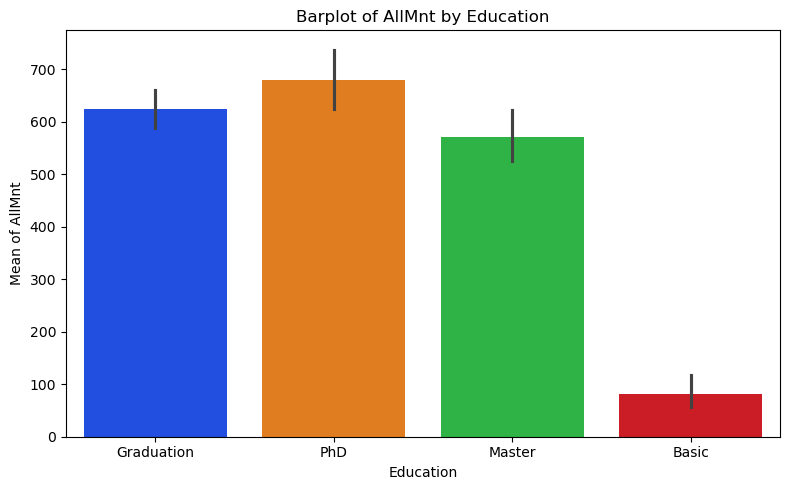

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\3715830829.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y=target, data=df, palette='bright')


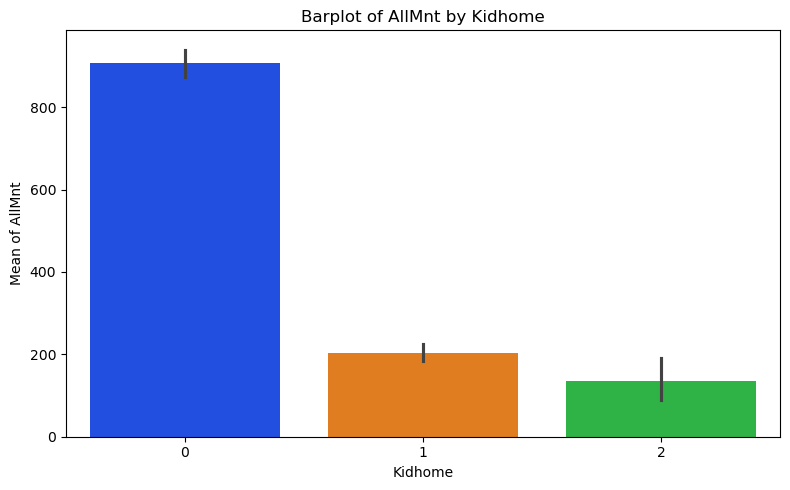

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\3715830829.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y=target, data=df, palette='bright')


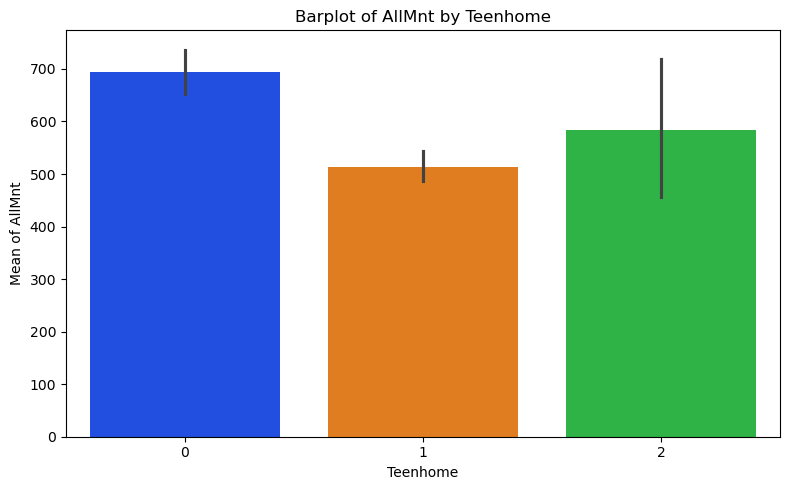

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\3715830829.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y=target, data=df, palette='bright')


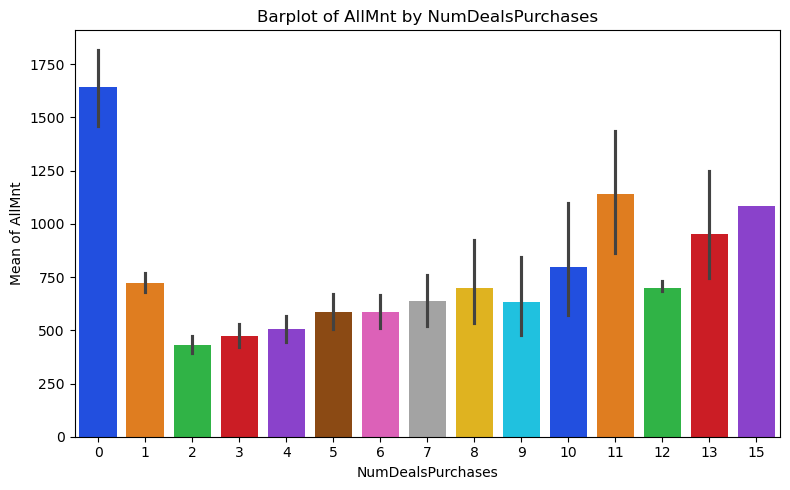

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\3715830829.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y=target, data=df, palette='bright')


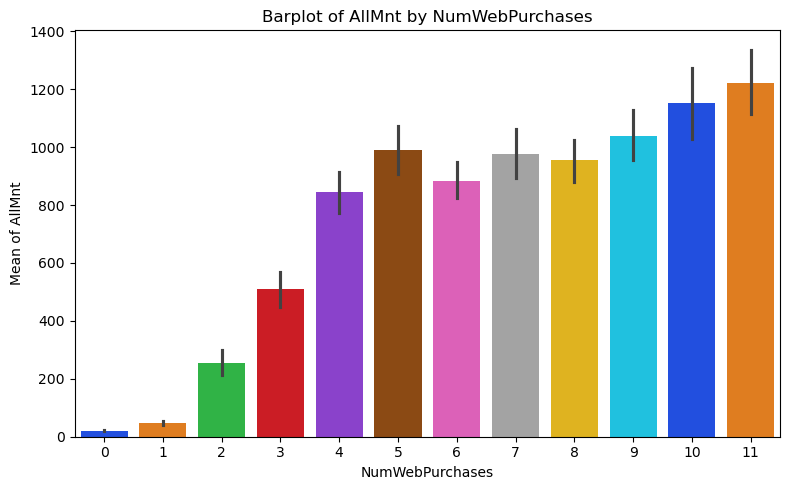

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\3715830829.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y=target, data=df, palette='bright')


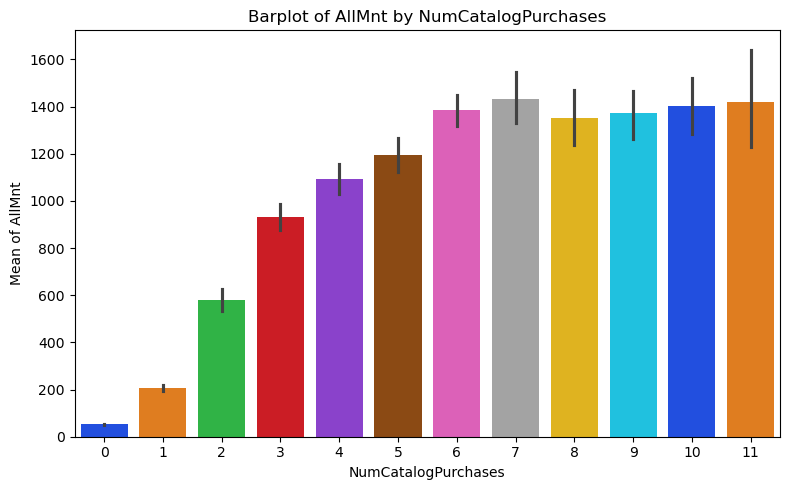

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\3715830829.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y=target, data=df, palette='bright')


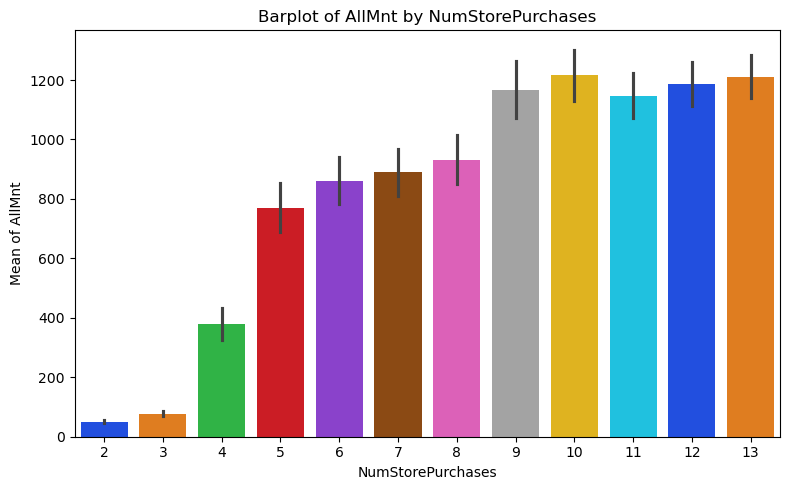

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\3715830829.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y=target, data=df, palette='bright')


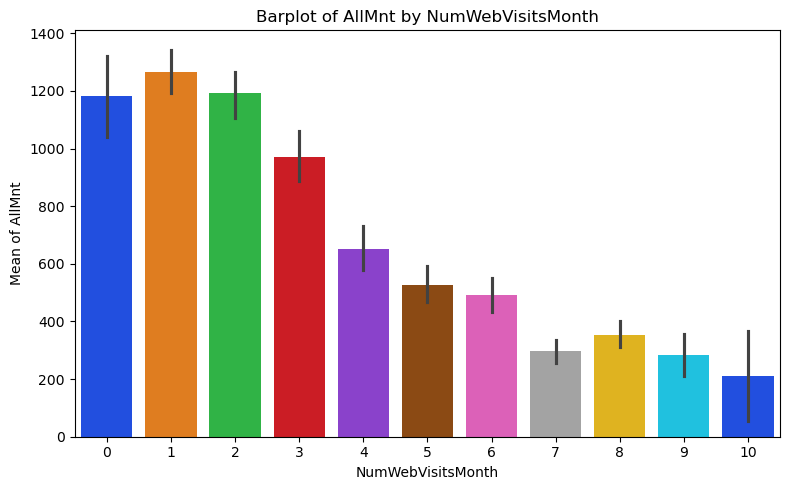

C:\Users\USER\AppData\Local\Temp\ipykernel_18172\3715830829.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y=target, data=df, palette='bright')


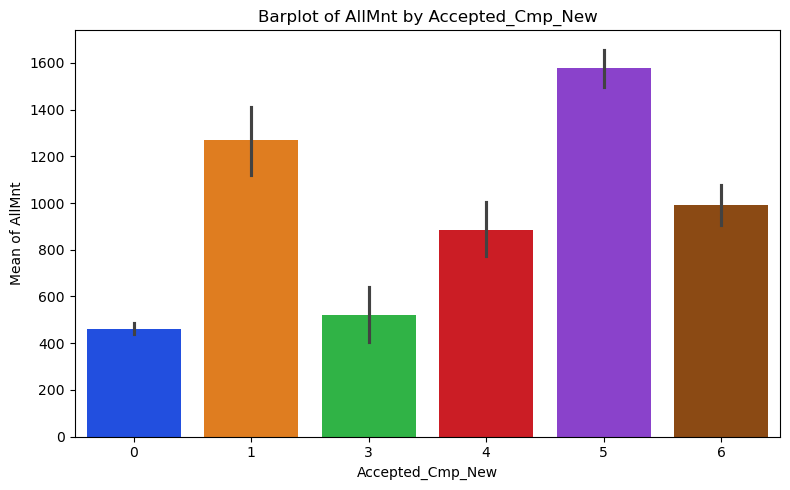

In [44]:
categorical_var = ['Education', 'Kidhome', 'Teenhome', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Accepted_Cmp_New']

numerical_var = ['Income', 'Age']

# Target variable
target = 'AllMnt'

for var in categorical_var:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=var, y=target, data=df, palette='bright')
    plt.title(f'Barplot of {target} by {var}')
    plt.ylabel(f'Mean of {target}')
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()
    print("="*80)

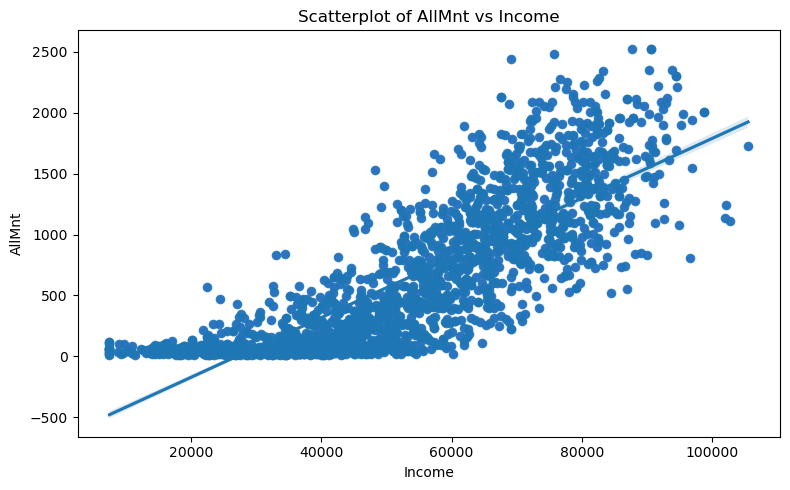

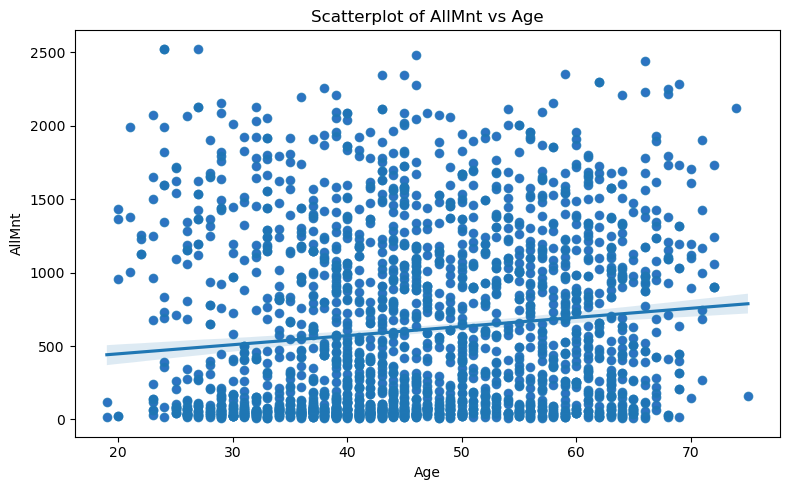

In [45]:
for var in numerical_var:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=var, y=target, data=df, color='blue', alpha=0.6)
    sns.regplot(x=var, y=target, data=df)
    plt.title(f'Scatterplot of {target} vs {var}')
    plt.xlabel(var)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()
    print("="*80)

In [47]:
df_mnt_in_age = df[['ID','Age','Income','AllMnt']]
df_mnt_in_age.to_excel('Supermarket Customers_Mnt_Income_Age.xlsx', index=False)
df_mnt_in_age

,ID,Age,Income,AllMnt
0,5524,58,58138.0,1617
1,2174,61,46344.0,27
2,4141,50,71613.0,776
3,6182,31,26646.0,53
4,5324,34,58293.0,422
...,...,...,...,...
2235,10870,48,61223.0,1341
2236,4001,69,64014.0,444
2237,7270,34,56981.0,1241
2238,8235,59,69245.0,843


In [48]:
df_dl = df[['ID','Kidhome', 'Teenhome', 'NumDealsPurchases', 'AllMnt']]
df_dl.to_excel('Supermarket Customers_Sigonly_summary.xlsx', index=False)

In [49]:
df.to_excel('Supermarket Customers_Cleaned.xlsx', index=False)

## Kesimpulan

Terdapat hubungan antara demografi, promosi, dan mode pembelian terhadap pengeluaran belanja dari pembeli. Oleh karena itu, insight dari data dapat digunakan untuk menentukan strategi penjualan di masa depan

### Insight dari data:

- Daya beli di pengaruhi pemasukan
- Pembeli yang berumur memiliki kecenderungan belanja lebih banyak
- Semakin sedikit anak (remaja/anak) semakin besar pengeluaran
- Pada pembeli yang tidak menggunakan diskon, belanja semakin banyak, namun seiring pertambahan penggunaan diskon, pengeluaran semakin banyak pula
- Semakin sering mengakses Online Store, Katalog, dan Toko (fisik) semakin tinggi juga belanja
- Pembeli yang jarang mengakses Online Store memiliki pengeluaran belanja lebih banyak
- Semakin sering dikampanyekan, semakin banyak pengeluaran belanja

### Rekomendasi:

- Alokasi budget untuk promosi dan pembelian barang-barang luxury goods
- Lakukan kampanye penjualan barang-barang yang biasa dibutuhkan/diinginkan orang dewasa (Minuman keras, bahan makanan premium), dapat dilakukan dengan bundling atau kampanye pada waktu tertentu
- Kampanye tertarget pada orang dewasa dengan income tinggi pada ketiga Channel pembelian (Online Store, Katalog, dan Toko Fisik)